# 2.4: Evaluating Hyperparameters - Part 1

Objective: Optimzing parameters using Random Search - Random Forests.

### This script contains the following:

## 1. [Import Libraries](#import_libraries)

## 2 [Preprocessing for Random Forest (1990s All Weather Stations)](#1990all)

#### 2.1 [Hyperparameter Optimization -Random Search](#hyper1)

### 2.2 [Running Random Forest with Optimized Search Parameters](#running1)

#### 2.2 [Uncovering Feature Importance](#importance1)

## 3. [Preprocessing for Random Forest (1990s Madrid Weather Stations)](#1990madrid)

#### 3.1 [Hyperparameter Optimization - Random Search](#hyper2)

#### 3.2 [Running Random Forest with Optimized Search Parameters](#running2)

#### 3.3 [Uncovering Feature Importance](#importance2)




## 1. Importing Libraries and Data <a id='import_libraries'></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [17]:
#create a path to the folder

path = r'/content/drive/MyDrive/Careerfoundary/Machine_learning'

In [18]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [19]:
# Import cleaned weather observations data

df = pd.read_csv(os.path.join(path, '012 Data', 'Prepared_Data', 'weather_cleaned_Date.csv'), index_col = False)

In [20]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [21]:
df.shape

(22950, 137)

In [22]:
# Import predictions data

df_pleasant = pd.read_csv(os.path.join(path, '012 Data', 'Original_Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [23]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df_pleasant.shape

(22950, 16)

# 2.2 Preprocessing for Random Forest 1 (1990s All weather Stations)  <a id='1990all'></a>

In [39]:
# Filter weather dataset to 1990s
df_1990s = df[df['DATE'].astype(str).str.startswith('199')]
df_1990s.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,19900101,1,0,0.83,1.0217,0.60,0.00,7.2,-2.1,-3.6,1.2,2,0.86,1.0246,0.19,0.00,5.3,-1.3,-5.3,3.7,8,0.80,1.0263,0.18,0.0,0.0,0.1,-0.8,0.6,8,0.90,1.0198,0.10,0.00,0.0,0.5,0.0,1.2,8,0.93,1.0196,0.12,0.03,0.0,0.6,0.0,1.0,8,0.92,1.0160,0.13,0.15,0.0,4.5,2.6,9.9,8,0.94,1.0205,0.12,0.0,0.0,-1.3,-1.5,-0.7,8,0.80,1.0217,0.14,0.0,0.0,-1.5,-2.0,-0.6,8,0.96,1.0197,0.12,0.0,0.0,0.5,0.1,0.8,8,0.96,1.0215,0.29,0.65,0.0,7.7,7.0,8.4,2,0.89,1.0217,0.71,0.00,7.4,-5.4,-8.0,-0.4,7,0.76,1.0241,0.04,0.00,0.0,-6.7,-11.9,-4.2,0,0.52,1.0321,0.99,0.0,8.6,-8.2,-9.7,-6.7,6,0.76,1.0220,0.13,0.00,1.9,-2.9,-4.2,-0.3,3,0.82,1.0068,0.20,0.51,2.0,6.9,4.5,9.4
10959,19900102,1,2,0.84,1.0238,0.48,0.00,2.3,-1.8,-3.9,1.7,8,0.83,1.0235,0.18,0.03,0.0,-0.9,-2.0,-0.2,8,0.87,1.0233,0.18,0.0,0.0,-0.4,-0.8,0.5,7,0.94,1.0220,0.13,0.00,0.0,1.0,-0.8,2.2,8,0.91,1.0220,0.12,0.00,0.0,2.1,0.7,2.4,6,0.92,1.0178,0.13,0.00,0.0,5.2,0.4,5.5,8,0.92,1.0225,0.12,0.0,0.0,-0.7,-1.5,-0.2,8,0.82,1.0218,0.17,0.0,0.0,-1.9,-3.0,-1.3,8,0.99,1.0222,0.12,0.0,0.0,1.2,-1.8,2.8,8,0.90,1.0232,0.29,0.50,0.0,6.5,5.6,7.4,3,0.80,1.0238,0.60,0.00,5.0,-3.1,-10.4,3.0,8,0.73,1.0232,0.04,0.00,0.0,-5.9,-6.2,-4.3,1,0.63,1.0348,1.00,0.0,8.6,-10.4,-13.3,-7.5,8,0.73,1.0229,0.05,0.01,0.0,-4.3,-5.0,-3.4,5,0.79,1.0040,0.21,1.48,0.1,7.3,4.7,9.9
10960,19900103,1,8,0.89,1.0231,0.20,0.00,0.0,-2.2,-4.2,0.4,5,0.88,1.0241,0.18,0.

In [40]:
# Check shape
df_1990s.shape

(3652, 137)

In [41]:
# Filter pleasant dataset to 1990s
pleasant_1990s = df_pleasant[df_pleasant['DATE'].astype(str).str.startswith('199')]
pleasant_1990s.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
10958,19900101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10959,19900102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10960,19900103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10961,19900104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10962,19900105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Check shape
pleasant_1990s.shape

(3652, 16)

In [43]:
# Drop 'DATE' and 'MONTH' columns from 2010s weather dataset
df_1990s_2 = df_1990s.drop(columns=['DATE', 'MONTH'])

# Check shape
df_1990s_2.shape

(3652, 135)

In [44]:
# Drop 'DATE' column from 2010s pleasant dataset
pleasant_1990s_2 = pleasant_1990s.drop(columns=['DATE'])

# Check shape
pleasant_1990s_2.shape

(3652, 15)

In [129]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_2 = pleasant_1990s_2.max(axis=1)
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (3652,)


In [130]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_2_combined:", y_2.unique())

Unique values in y_2_combined: [0 1]


In [131]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

In [132]:
# Check shape
y_2.shape

(3652,)

In [133]:
# Create X matrix
X_2 = df_1990s_2.to_numpy()

In [134]:
# Check shapes
print(X_2.shape)
print(y_2.shape)

(3652, 135)
(3652,)


In [135]:
# Split data into training and testing sets

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

In [136]:
# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(2739, 135) (2739,)
(913, 135) (913,)


# Hyperparameter Optimization <a id='hyper1'></a>

## **Random Search**

In [137]:
# Creating a Random Forest classifier
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth=10)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=10)

In [138]:
# Perform the predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  0.9693318729463308


In [139]:
# Define random search cv

rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(100, 250, step=25),  # Focusing on around the best n_estimators
    'max_features': randint(30, 70),  # Adjusting to a narrower range based on grid search
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4),
    'min_samples_split': np.arange(2, 10, step=2)
}

In [140]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [142]:
start = time.time()
rf_random = RandomizedSearchCV(clf_2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train_2, y_train_2)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 2.644363510608673 minutes


In [143]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 61, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 150}
Best RANDOM search score is: 0.9711573566995254


# Running Random Forest with Optimized Search Parameters <a id='running1'></a>

In [146]:
# Create a RF classifier with the best results from above - Use Grid Search results
clf3 = RandomForestClassifier(n_estimators = 150, max_depth=50, max_features=61, min_samples_leaf=3, min_samples_split=8)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=50, max_features=61, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=150)

In [147]:
# Perform predictions on the test dataset
y_pred_2 = clf3.predict(X_test_2)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  0.9824753559693319


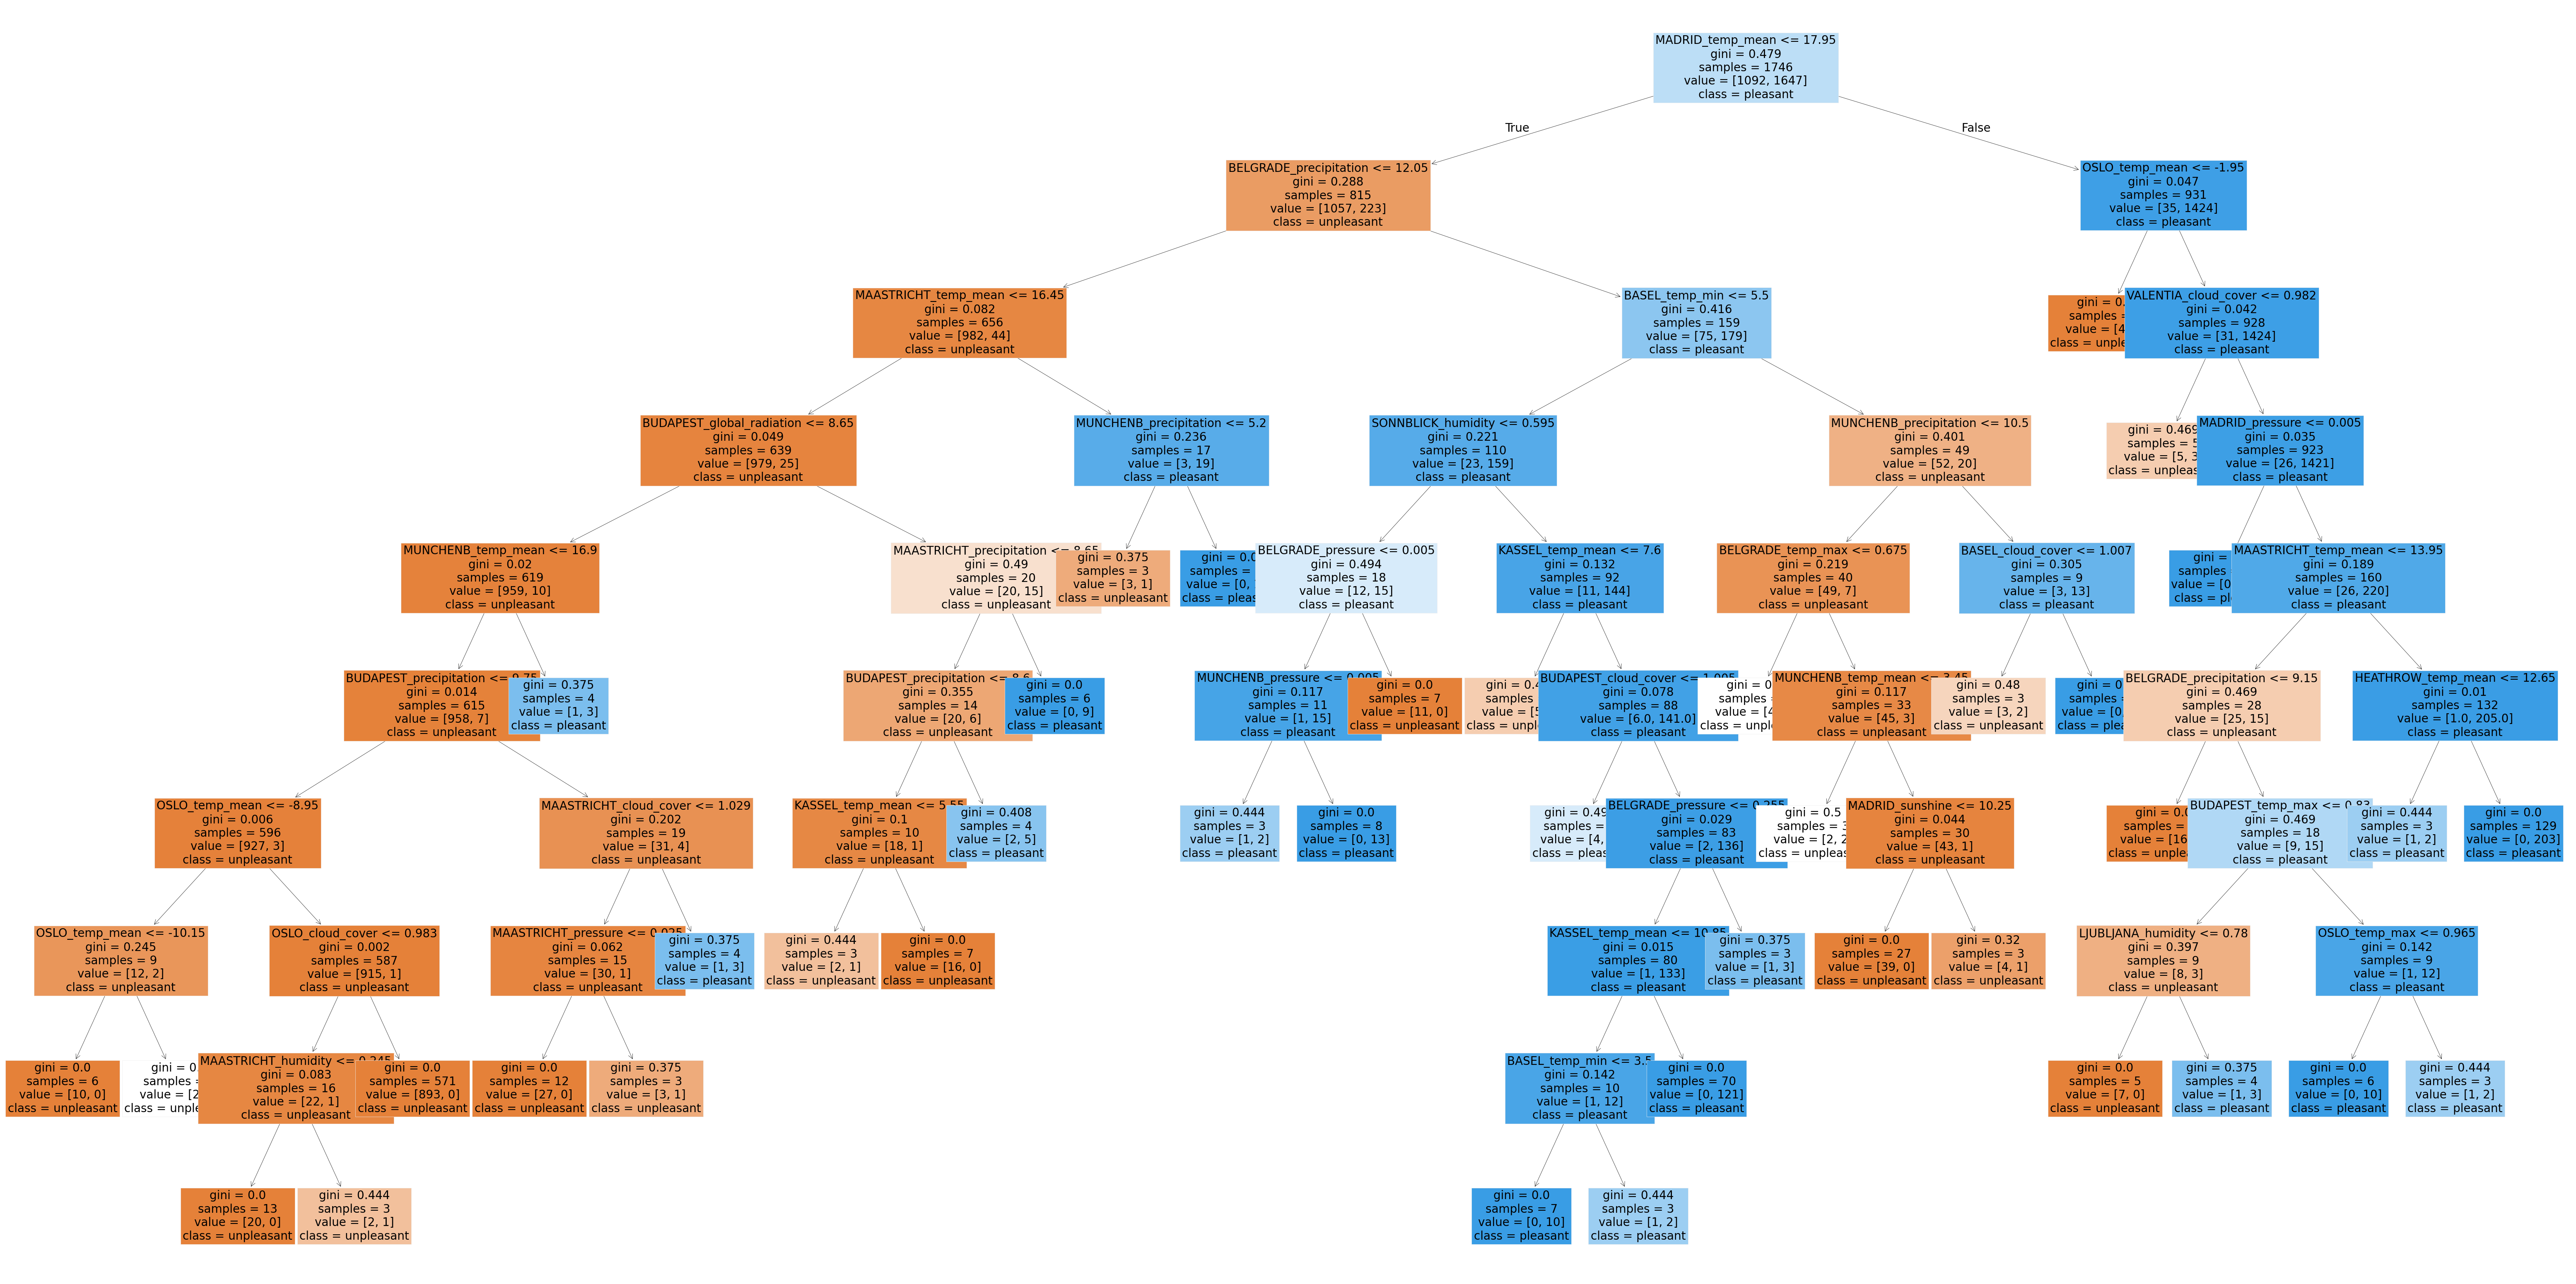

In [149]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = df_1990s.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

# Uncovering Feature Importances - 1990's Data  <a id='importances1'></a>

In [150]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.26250668e-04, 7.38654947e-04, 4.22717840e-04, 6.62256732e-04,
       4.68464108e-04, 1.60300907e-04, 2.68473623e-03, 2.33305648e-04,
       4.60773878e-03, 2.14040252e-03, 2.79297437e-03, 3.90280680e-04,
       2.42713600e-03, 1.50394190e-02, 2.20245963e-03, 1.86883162e-02,
       1.30609304e-03, 3.79640994e-02, 3.27721989e-04, 9.93721743e-04,
       2.04552138e-04, 1.36408371e-03, 2.31330416e-03, 1.35109429e-03,
       1.50434728e-02, 4.24088753e-04, 5.87468206e-02, 1.77376302e-04,
       3.43926612e-04, 1.94338235e-04, 1.22256290e-03, 5.01617403e-04,
       2.42379999e-04, 1.05272115e-03, 6.23243722e-04, 2.00910378e-03,
       3.13915490e-05, 5.15736161e-04, 1.01243165e-04, 6.66958448e-04,
       2.45447260e-04, 4.12841964e-04, 1.12915416e-03, 5.42026386e-04,
       4.63909301e-03, 1.56029267e-04, 4.12050817e-04, 2.95886996e-04,
       1.16486884e-03, 3.00566096e-04, 3.91262067e-04, 8.29227335e-04,
       6.52635796e-04, 1.60122033e-03, 1.63798242e-04, 1.35065783e-04,
      

In [151]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.26250668e-04, 7.38654947e-04, 4.22717840e-04, 6.62256732e-04,
         4.68464108e-04, 1.60300907e-04, 2.68473623e-03, 2.33305648e-04,
         4.60773878e-03],
        [2.14040252e-03, 2.79297437e-03, 3.90280680e-04, 2.42713600e-03,
         1.50394190e-02, 2.20245963e-03, 1.86883162e-02, 1.30609304e-03,
         3.79640994e-02],
        [3.27721989e-04, 9.93721743e-04, 2.04552138e-04, 1.36408371e-03,
         2.31330416e-03, 1.35109429e-03, 1.50434728e-02, 4.24088753e-04,
         5.87468206e-02],
        [1.77376302e-04, 3.43926612e-04, 1.94338235e-04, 1.22256290e-03,
         5.01617403e-04, 2.42379999e-04, 1.05272115e-03, 6.23243722e-04,
         2.00910378e-03],
        [3.13915490e-05, 5.15736161e-04, 1.01243165e-04, 6.66958448e-04,
         2.45447260e-04, 4.12841964e-04, 1.12915416e-03, 5.42026386e-04,
         4.63909301e-03],
        [1.56029267e-04, 4.12050817e-04, 2.95886996e-04, 1.16486884e-03,
         3.00566096e-04, 3.91262067e-04, 8.29227335e-04, 6.52635796

In [152]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.01010443, 0.08295118, 0.08076886, 0.00636727, 0.00828389,
       0.00580375, 0.0218291 , 0.24425416, 0.01207238, 0.48015592,
       0.02054997, 0.00658036, 0.00419508, 0.01181147, 0.00427218])

In [154]:
# Extract stations list

stations = [col.split('_')[0] for col in df_1990s.columns if '_' in col]

In [155]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [156]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [157]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

,0
BUDAPEST,0.480156
DEBILT,0.244254
STOCKHOLM,0.082951
BELGRADE,0.080769
LJUBLJANA,0.021829
BASEL,0.020550
MUNCHENB,0.012072
OSLO,0.011811
SONNBLICK,0.010104
DUSSELDORF,0.008284


In [158]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['SONNBLICK', 'STOCKHOLM', 'BELGRADE', 'HEATHROW', 'DUSSELDORF', 'VALENTIA', 'LJUBLJANA', 'DEBILT', 'MUNCHENB', 'BUDAPEST', 'BASEL', 'KASSEL', 'MADRID', 'OSLO', 'MAASTRICHT']


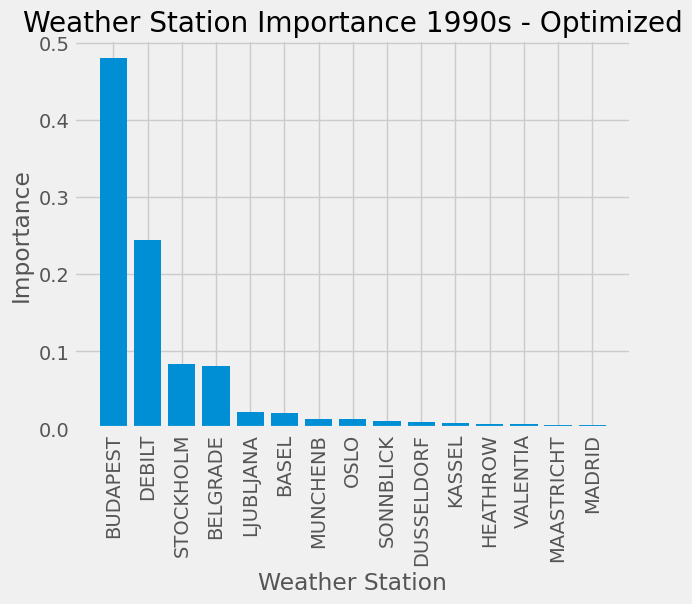

In [160]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 1990s - Optimized')

plt.savefig(os.path.join(path,'optimized_featureimportance_1990s.png'), bbox_inches='tight')

plt.show()

# 5.1 Preprocessing for Random Forest (1990 Madrid Weather Station) <a id='1990madrid'></a>

**Preprocessing the Data for Madrid**

In [78]:
# Filter weather dataset to only include Madrid
df_mad = df[df.columns[df.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_mad.head()

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
0,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8
1,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2
2,5,0.90,1.0287,0.63,0.0,2.3,8.6,6.4,10.8
3,0,0.75,1.0281,1.16,0.0,8.7,10.3,4.5,16.1
4,2,0.64,1.0269,1.10,0.0,7.8,12.1,8.2,16.0


In [79]:
# Filter pleasant dataset to only include Madrid
mad_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('MADRID')]]

# Check output
mad_pleasant.head()

,MADRID_pleasant_weather
0,0
1,0
2,0
3,0
4,0


In [80]:
# Check shape
print(df_mad.shape)
print(mad_pleasant.shape)

(22950, 9)
(22950, 1)


In [81]:
# Create matrices
y_3 = mad_pleasant.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [82]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [83]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(22950,)


In [84]:
# Create X matrix
X_3 = df_mad.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [85]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


# Hyperparameter Optimization <a id='hyper2'></a>

## **Random Search**

In [178]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [179]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.9963401882188916


In [184]:
# Define random search cv
rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(100, 250, step=25),  # Focusing on around the best n_estimators
    'max_features': randint(30, 70),  # Adjusting to a narrower range based on grid search
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4),
    'min_samples_split': np.arange(2, 10, step=2)
}

In [185]:
# Create a RF classifier

clf3= RandomForestClassifier()

In [186]:
start = time.time()
rf_random = RandomizedSearchCV(clf3, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train_3, y_train_3)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 0.8586185336112976 minutes


In [188]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 38, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RANDOM search score is: 1.0


# Running Random Forest with Optimized Search Parameters <a id='running2'></a>

In [191]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test_3)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred3))

Model Accuracy:  1.0


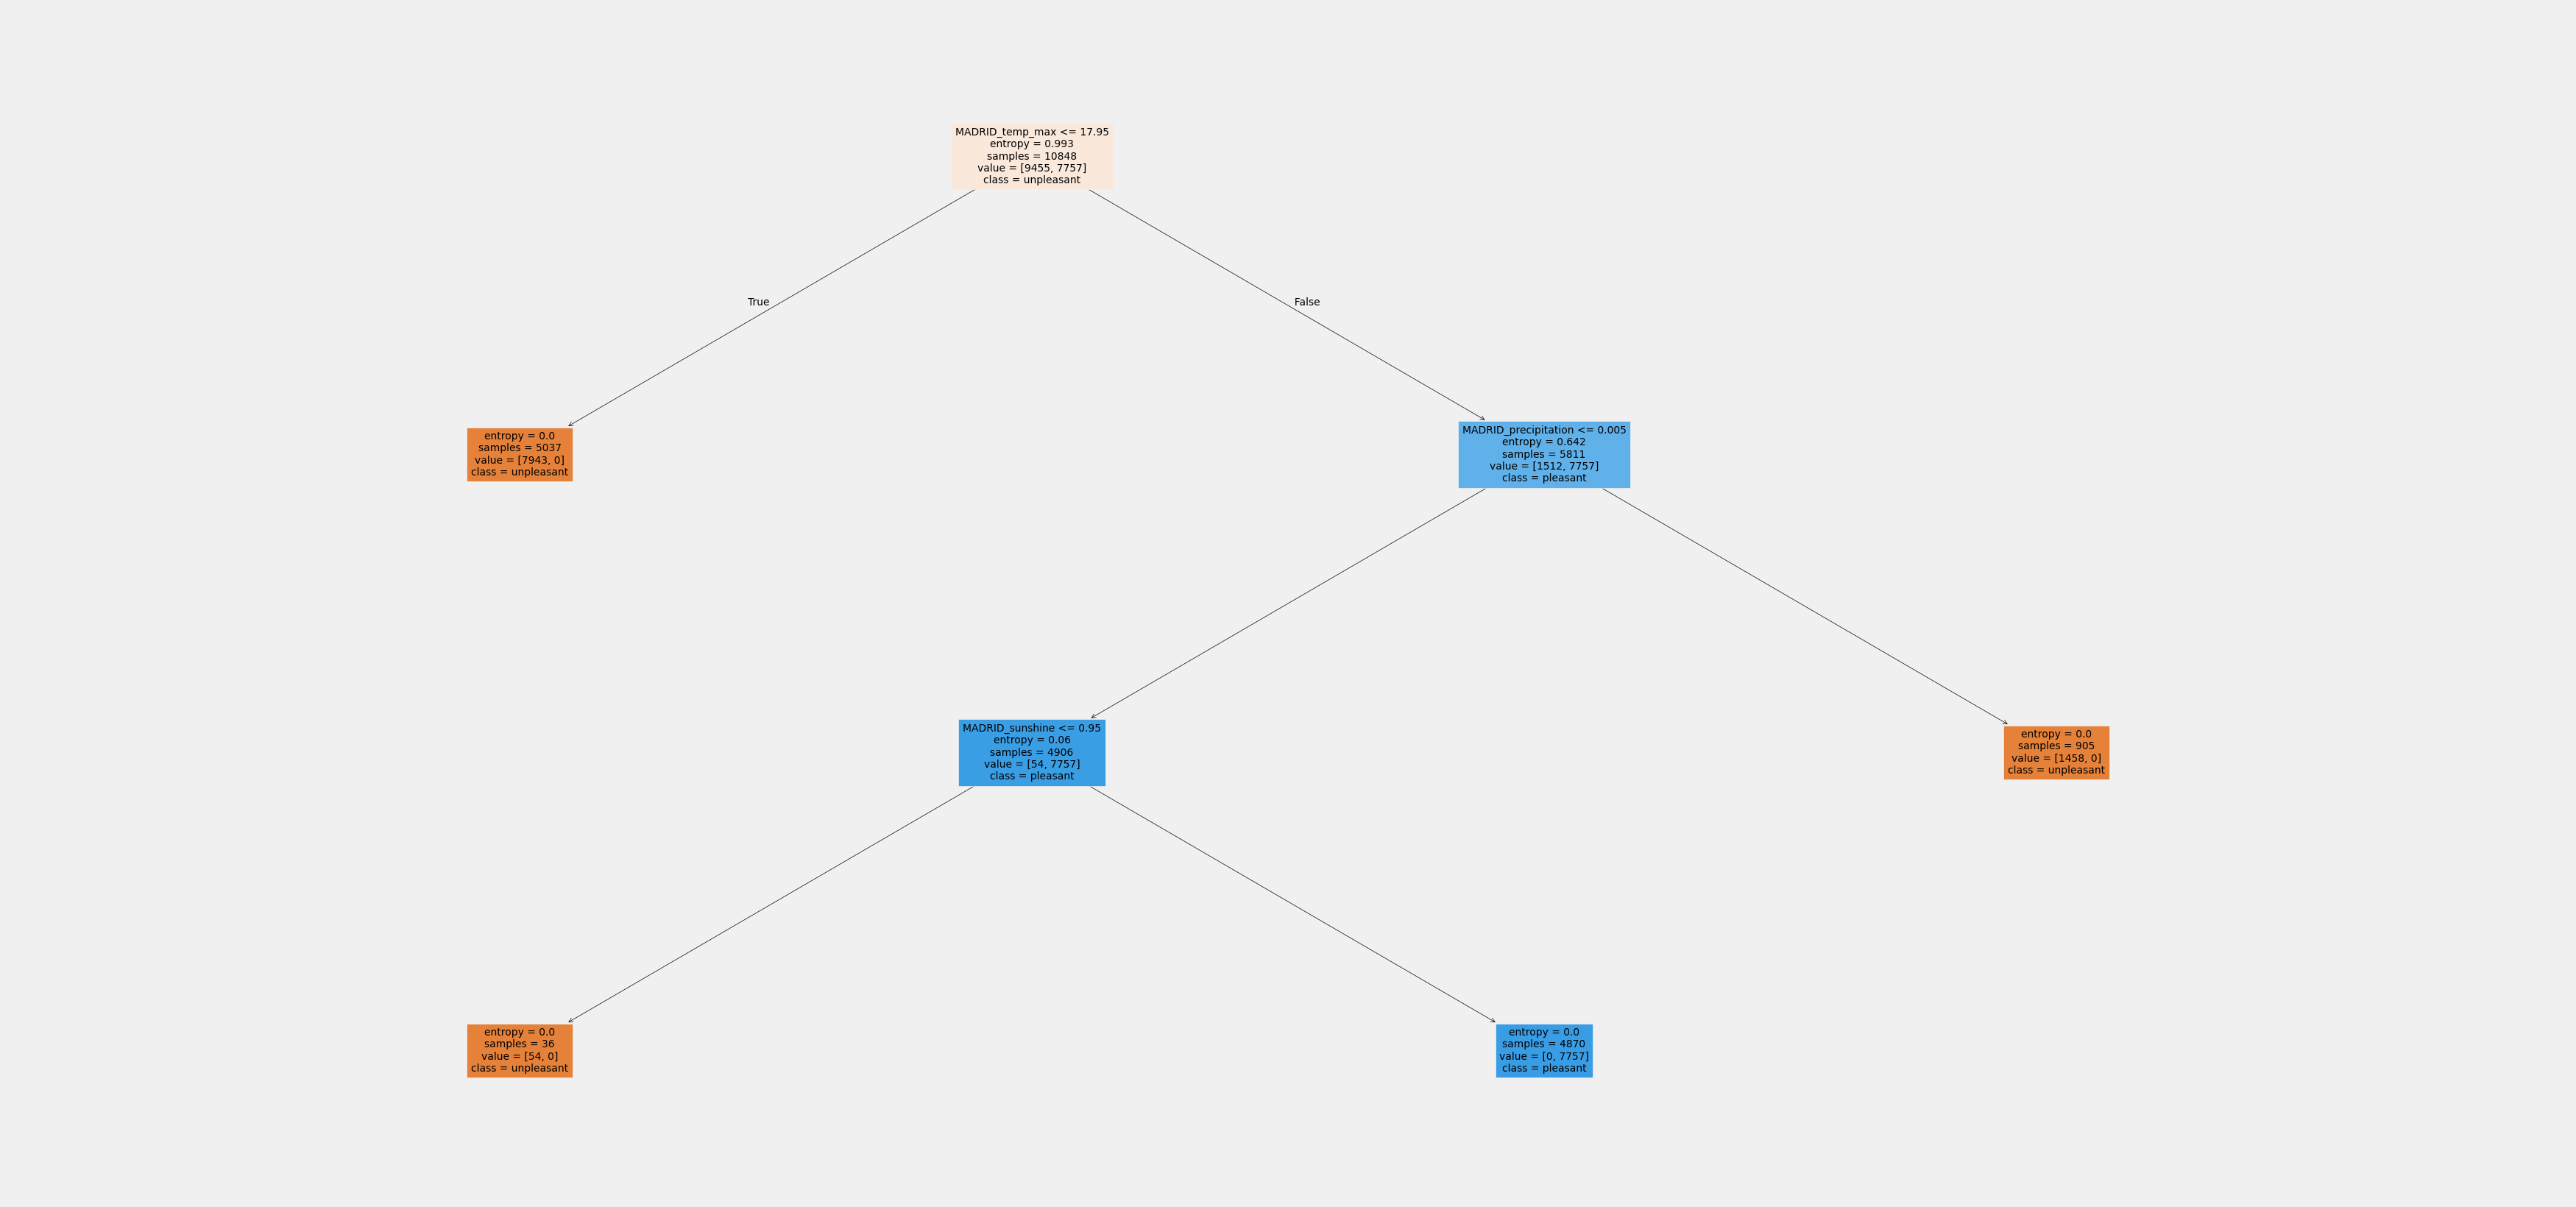

In [193]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf3.estimators_[6], fontsize = 10, feature_names = df_mad.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

# Uncovering Feature Importances <a id='importance2'></a>

In [194]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.        , 0.        , 0.        , 0.        , 0.30549817,
       0.03055816, 0.        , 0.        , 0.66394367])

In [195]:
# Retrieve feature importances from the trained model
mas_importance = clf3.feature_importances_
print("Feature Importances:", mas_importance)
print(mas_importance.shape)

Feature Importances: [0.         0.         0.         0.         0.30549817 0.03055816
 0.         0.         0.66394367]
(9,)


In [196]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation',
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [197]:
# Create a dataframe to associate observation measurements with their importances
mas_importance = pd.DataFrame({
    'Measurement': measurements,
    'Importance': mas_importance
})

In [198]:
# Sort by importance for chart readability
mas_importance = mas_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(mas_importance)

Feature Importance:
        Measurement  Importance
8          temp_max    0.663944
4     precipitation    0.305498
5          sunshine    0.030558
0       cloud_cover    0.000000
1          humidity    0.000000
2          pressure    0.000000
3  global_radiation    0.000000
6         temp_mean    0.000000
7          temp_min    0.000000


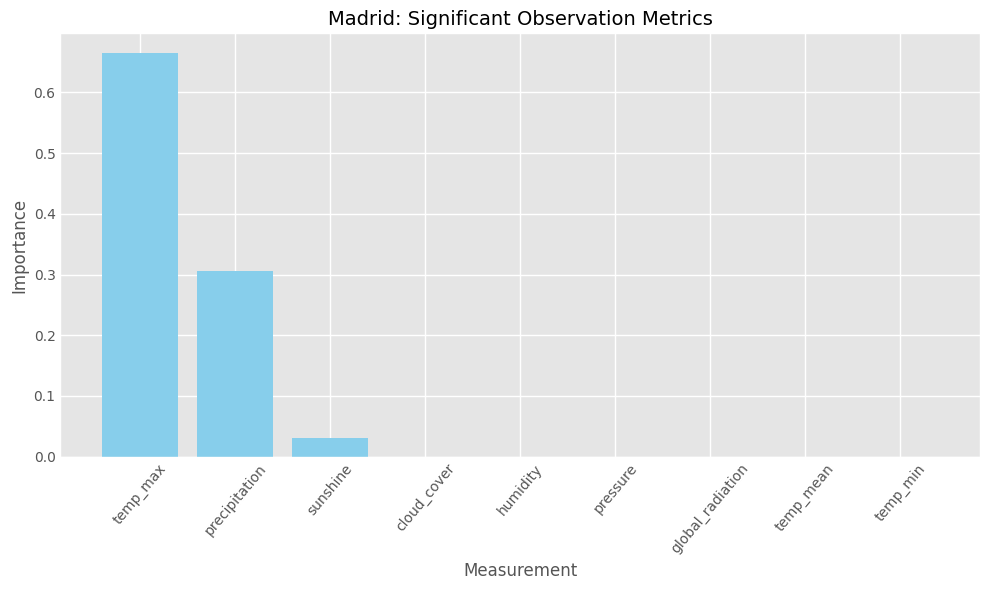

In [199]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(mas_importance['Measurement'], mas_importance['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()